    University Federal of Pará - Brasil
    Ananindeua - 2019
    Maike Reis
    NeuralNetwork with Backpropagation

# <span style='font-family:"Times New Roman"'> <span styel=''>A neuron diagram
<div>
<img src="Arquivos/NeuronDiagram.png" width="500px"/>
</div>

---

## <span style='font-family:"Times New Roman"'> <span styel=''>_A Neuron output is_: 
### <span style='font-family:"Times New Roman"'> <span styel=''>$$r_j = \sum_{i=1}^n w_{ji} x{_i} + \beta_j \\ y_j = \phi({\sum_{i=1}^n w_{ji} x{_i} + \beta_j})$$
#### <span style='font-family:"Times New Roman"'> <span styel=''>with *i* input, and _j_ neurons and, $\phi$ activation function

# <span style='font-family:"Times New Roman"'> <span styel=''>Using arrays
#### <span style='font-family:"Times New Roman"'> <span styel=''>$$ W_l= \begin{bmatrix} W_{00} & W_{01} & W_{02} \\ W_{10} & {\ddots} & {\vdots} \\ W_{20} & {\cdots} & W_{22}\end{bmatrix}_{(jxi)} X_i = \begin{bmatrix} X_0 \\ X_1 \\ \vdots \\X_i \end{bmatrix}_{(ix1)} \beta_l = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots\\ \beta_2 \end{bmatrix}_{(jx1)} $$

# <span style='font-family:"Times New Roman"'> <span styel=''>the output of each layer is
#### <span style='font-family:"Times New Roman"'> <span styel=''>$$ R_l= \begin{bmatrix} W_{00} & W_{01} & W_{02} \\ W_{10} & {\ddots} & {\vdots} \\ W_{20} & {\cdots} & W_{22}\end{bmatrix}_{(jxi)}\times \begin{bmatrix} X_0 \\ X_1 \\ \vdots \\X_i \end{bmatrix}_{(ix1)} + \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots\\ \beta_2 \end{bmatrix}_{(jx1)} $$
#### <span style='font-family:"Times New Roman"'> <span styel=''>$$Y_l = \phi(R_l)$$

# <span style='font-family:"Times New Roman"'> <span styel=''>We need to build a class that implements this operations, and create a virtual layer

In [1919]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# <span style='font-family:"Times New Roman"'> <span styel=''> Class Layer
## <span style='font-family:"Times New Roman"'> <span styel=''>Its implements linear, tanh and sigmoid activation functions. With getters and setters to prevent errors

In [1920]:
class Layer:
    """
    Class Layer
    
    param n_inputs
        
        *input layer: is the number os inputs this layer.
        
        *hidden and output layers: amount of previous layer neurons 
    
    param n_neurons: number of layer neurons.
     
    param weigths: weights on input of each layer neuron.
    
    param bias: bias in each layer neuron. Should be at 0 to 1 range.
     
    param activation_type: in the string name of activation function('linear', 'sigmoid', 'tanh')
    """    
    
    def __init__(self, n_inputs, n_neurons, weigths=None, bias=None, activation_type=None):
       
        self.n_inputs = n_inputs
        self.n_neurons = n_neurons
        self.weigths = weigths
        self.bias = bias
        self.activation_type = activation_type
        
    @property
    def n_inputs(self):
        return self._n_inputs
    @n_inputs.setter
    def n_inputs(self, num_inputs):
        self._n_inputs = num_inputs if num_inputs>=0 else 0   

    @property
    def n_neurons(self):
        return self._n_neurons    
    @n_neurons.setter
    def n_neurons(self, num_neurons):
        self._n_neurons = num_neurons if num_neurons>=0 else 0

    @property
    def weigths(self):
        return self._weigths 
    @weigths.setter
    def weigths(self, new_weigths):
        self._weigths = new_weigths if new_weigths is not None else np.random.rand(self.n_neurons, self.n_inputs)
            
    @property
    def bias(self):
        return self._bias
    
    @bias.setter
    def bias(self, new_bias):
        self._bias = new_bias if new_bias is not None else np.random.rand(self.n_neurons)

    @property
    def activation_type(self):
        return self._activation_type
    
    @activation_type.setter
    def activation_type(self, activation_func):
        if activation_func is None or activation_func == 'linear':
            self._activation_type = 'linear'
        elif activation_func == 'tanh':
            self._activation_type = 'tanh'
        elif activation_func == 'sigmoid':
            self._activation_type =  'sigmoid'
                      
    def _phi(self, r):
        if self._activation_type == 'linear':
            return r
        elif self._activation_type == 'tanh':
            return np.tanh(r)
        elif self._activation_type == 'sigmoid':
            return 1 / (1 + np.exp(-r))

    def activate(self, inputs):
        #Build matriz operations S = WxI + B
        r = np.dot(self._weigths, inputs) + self.bias
        #Activate S with the activation function A(S)
        self.last_activation = self._phi(r)
        return self.last_activation
    
    def phi_derivade(self, phi):
        if self.activation_type == 'linear':
            return np.ones(len(phi),dtype=int)
        if self.activation_type == 'tanh':
            return 1 - phi ** 2
        if self.activation_type == 'sigmoid':
            return phi * (1 - phi)
        return phi

# <span style='font-family:"Times New Roman"'> <span styel=''> Testing the class

## <span style='font-family:"Times New Roman"'> <span styel=''> Example, with know parameters: 

$$W_l= \begin{bmatrix} 1 & 1 \\ 2 & 2\end{bmatrix}_{2x2},  X_i = \begin{bmatrix} 1 \\ 1 \end{bmatrix}_{2x1}, \beta_l = \begin{bmatrix} 0.5 \\ 0.5\end{bmatrix}_{2x1}$$ 

$$R_l= \begin{bmatrix} 1 & 1 \\ 2 & 2\end{bmatrix}_{2x2}\times\begin{bmatrix} 1 \\ 1 \end{bmatrix}_{2x1}+\begin{bmatrix} 0.5 \\ 0.5\end{bmatrix}_{2x1} \rightarrow Y_l=\begin{bmatrix} 2.5 \\ 4.5\end{bmatrix}_{2x1}$$ 

In [1921]:
l_weigths=[[1,1],[2,2]]
l_bias=[0.5,0.5]
phi='linear'

layer_l = Layer(n_inputs=2,n_neurons=2,weigths=l_weigths,
                bias=l_bias, activation_type=phi)
layer_l.activate([1,1])

/usr/local/lib/python3.6/dist-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


array([2.5, 4.5])

## <span style='font-family:"Times New Roman"'> <span styel=''> Example 2, creating random weigths and bias: 

In [1922]:
l_weigths=None
l_bias=None
phi=None

layer_l = Layer(n_inputs=2,n_neurons=2,weigths=l_weigths,
                bias=l_bias, activation_type='linear')

In [1923]:
layer_l.weigths

array([[0.53962188, 0.75146532],
       [0.63608319, 0.68968767]])

In [1924]:
layer_l.bias

array([0.7564703 , 0.37285422])

In [1925]:
layer_l.activate([1,1])

array([2.0475575 , 1.69862508])

# <span style='font-family:"Times New Roman"'> <span styel=''>Testing activation functions

## <span style='font-family:"Times New Roman"'> <span styel=''>To Linear activation function:
    
$$R_l =\begin{bmatrix} 1 & 1 \\ 2 & 2\end{bmatrix}\times\begin{bmatrix} 1 \\ 1 \end{bmatrix}+\begin{bmatrix} 0 \\ 0\end{bmatrix} \rightarrow R_l=\begin{bmatrix} 2 \\ 4\end{bmatrix} \rightarrow Y_l=R_l $$

In [1926]:
test_layer = Layer(n_inputs=2,n_neurons=2,weigths=[[1,1],[2,2]], bias=[0,0], activation_type='linear')

print('Y = %s' % test_layer.activate([1,1]))

Y = [2 4]


## <span style='font-family:"Times New Roman"'> <span styel=''>To Tanh activation function:
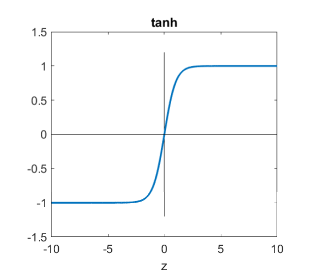
$$R_l =\begin{bmatrix} 1 & 1 \\ 2 & 2\end{bmatrix}\times\begin{bmatrix} 1 \\ 1 \end{bmatrix}+\begin{bmatrix} 0 \\ 0\end{bmatrix} \Longrightarrow R_l=\begin{bmatrix} 2.5 \\ 4.5\end{bmatrix} \Longrightarrow Y_l=tanh(R_l)\Longrightarrow Y_l=\begin{bmatrix} 0.986614 \\ 0.999753\end{bmatrix}$$

In [1927]:
test_layer = Layer(n_inputs=2,n_neurons=2,weigths=[[1,1],[2,2]], bias=[0.5,0.5], activation_type='tanh')
print('Y = %s' % test_layer.activate([1,1]))

Y = [0.9866143  0.99975321]


## <span style='font-family:"Times New Roman"'> <span styel=''>To Sigmoid activation function:
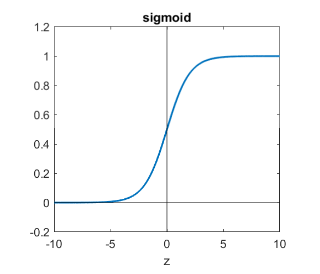
$$R_l =\begin{bmatrix} 1 & 1 \\ 2 & 2\end{bmatrix} \times \begin{bmatrix} 1 \\ 1 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.6\end{bmatrix} \rightarrow R_l=\begin{bmatrix} 2.1 \\ 4.6\end{bmatrix} \rightarrow Y_l=sigmoid(R_l) \rightarrow Y_l=\begin{bmatrix} 0.890903 \\ 0.990048\end{bmatrix}$$

In [1928]:
test_layer = Layer(n_inputs=2,n_neurons=2,weigths=[[1,1],[2,2]], bias=[0.1,0.6], activation_type='sigmoid')
print('Y = %s' % test_layer.activate([1,1]))

Y = [0.89090318 0.9900482 ]


# <span style='font-family:"Times New Roman"'> <span styel=''>Backpropagation

## <span style='font-family:"Times New Roman"'> <span styel=''>Suppose we have a neural network with 2 inputs, 1 hidden layers with 2 neurons, and 2 outputs, as follow

<div>

</div>

## <span style='font-family:"Times New Roman"'> <span styel=''>The question is; how much output error $E_{total}$ change affected by $W_i$? Or, in another term what is the ${\frac{\partial{E_{total}}}{\partial{W_i}}}$?
## <span style='font-family:"Times New Roman"'> <span styel=''>The gradient points to the direction of maximum variation of the vector, that's why we can use him to decrement or increment each weight in order to minimize output errors

## <span style='font-family:"Times New Roman"'> <span styel=''>Applying the Chain Rule, we get some expressions that we can use to build a algorithm

# <span style='font-family:"Times New Roman"'> <span styel=''>Output Layer

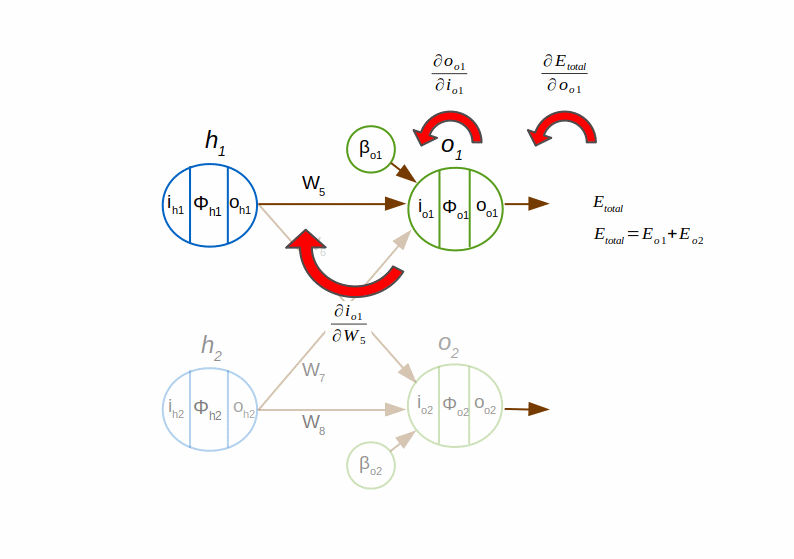$${\frac{\partial{E_{total}}}{\partial{W_5}}} ={\frac{\partial{E_{total}}}{\partial{o_{o1}}}} {\cdot} {\frac{\partial{o_{o1}}}{\partial{i_{o1}}}} {\cdot} {\frac{\partial{i_{o1}}}{\partial{W_5}}}$$

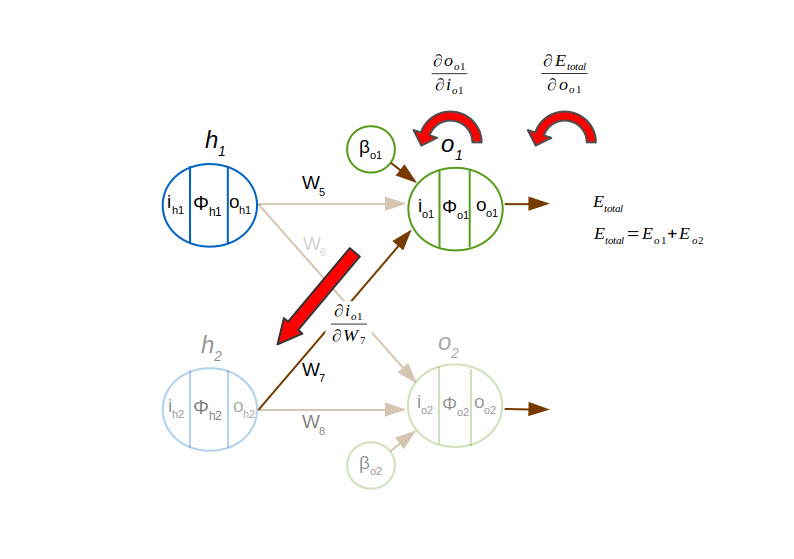$${\frac{\partial{E_{total}}}{\partial{W_7}}} ={\frac{\partial{E_{total}}}{\partial{o_{o1}}}} {\cdot} {\frac{\partial{o_{o1}}}{\partial{i_{o1}}}} {\cdot} {\frac{\partial{i_{o1}}}{\partial{W_7}}}$$

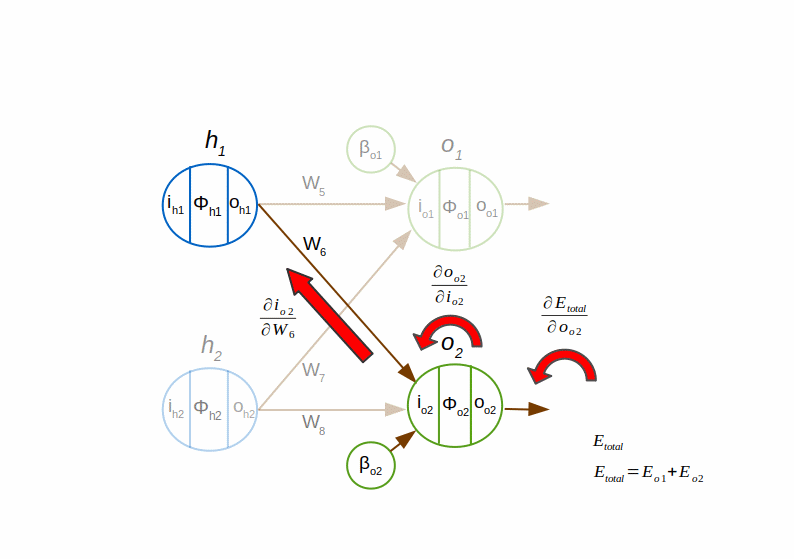$${\frac{\partial{E_{total}}}{\partial{W_6}}} ={\frac{\partial{E_{total}}}{\partial{o_{o2}}}} {\cdot} {\frac{\partial{o_{o2}}}{\partial{i_{o2}}}} {\cdot} {\frac{\partial{i_{o2}}}{\partial{W_6}}}$$

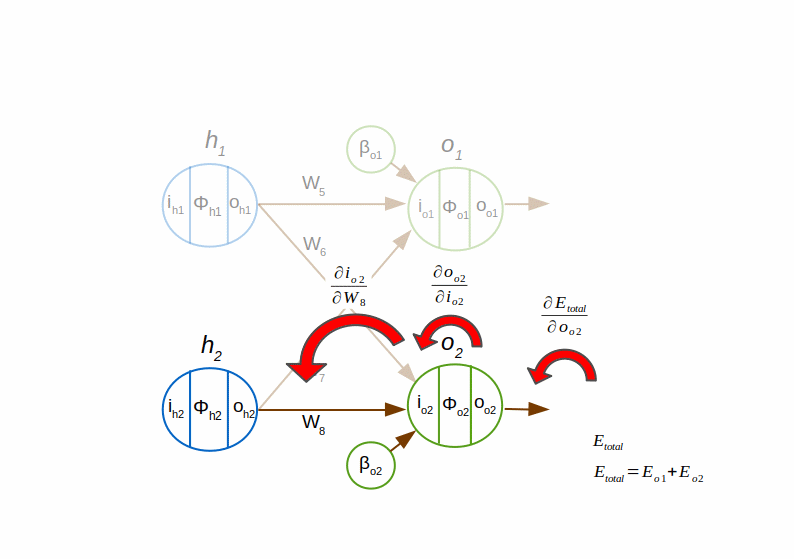$${\frac{\partial{E_{total}}}{\partial{W_8}}} ={\frac{\partial{E_{total}}}{\partial{o_{o2}}}} {\cdot} {\frac{\partial{o_{o2}}}{\partial{i_{o2}}}} {\cdot} {\frac{\partial{i_{o2}}}{\partial{W_8}}} $$

## <span style='font-family:"Times New Roman"'> <span styel=''> These equations tell us how error varies in function of weights

$${\frac{\partial{E_{total}}}{\partial{W_5}}} ={\frac{\partial{E_{total}}}{\partial{o_{o1}}}} {\cdot} {\frac{\partial{o_{o1}}}{\partial{i_{o1}}}} {\cdot} {\frac{\partial{i_{o1}}}{\partial{W_5}}}$$

$${\frac{\partial{E_{total}}}{\partial{W_7}}} ={\frac{\partial{E_{total}}}{\partial{o_{o1}}}} {\cdot} {\frac{\partial{o_{o1}}}{\partial{i_{o1}}}} {\cdot} {\frac{\partial{i_{o1}}}{\partial{W_7}}}$$

$${\frac{\partial{E_{total}}}{\partial{W_6}}} ={\frac{\partial{E_{total}}}{\partial{o_{o2}}}} {\cdot} {\frac{\partial{o_{o2}}}{\partial{i_{o2}}}} {\cdot} {\frac{\partial{i_{o2}}}{\partial{W_6}}}$$

$${\frac{\partial{E_{total}}}{\partial{W_8}}} ={\frac{\partial{E_{total}}}{\partial{o_{o2}}}} {\cdot} {\frac{\partial{o_{o2}}}{\partial{i_{o2}}}} {\cdot} {\frac{\partial{i_{o2}}}{\partial{W_8}}} $$

## <span style='font-family:"Times New Roman"'> <span styel=''> To solve them, we need of the expression of $E_{total}$, $o_{oi}$ and $ i_{oi} $
$$ i_{o1} = W_{5}\cdot o_{h1} +  W_{7}\cdot o_{h2} + \beta_{o1} \\ i_{o2} = W_{6}\cdot o_{h1} +  W_{8}\cdot o_{h2} + \beta_{o2} \\ i_{oj} = \sum_{i=1}^n W_{ji}\cdot o_{hi} + \beta_{oj} $$ with  _j_  neurons and *i* inputs
## <span style='font-family:"Times New Roman"'> <span styel=''>If we use Mean Squared Error(MSE) to calculate output errors, then 
$$E_{total} = {\frac{1}{2}(y_1 - o_{o1})^2 + \frac{1}{2}(y_2 - o_{o2})^2} \\ E_{total} = \sum_{j=1}^n {\frac{1}{2}(y_j - o_{oj})^2} $$  y - target and  $o_o$ - output
## <span style='font-family:"Times New Roman"'> <span styel=''>And finally, to function to $o_{oi}$
$$o_{o1} = \phi(i_{o1}) \\ o_{o2} = \phi(i_{o2}) \\ o_{oj} = \phi(i_{oj})$$
## <span style='font-family:"Times New Roman"'> <span styel=''> Applying derivades, we get
    
$${\frac{\partial{E_{total}}}{\partial{o_{oj}}}} = -(y_j - o_{oj})$$
    
$${\frac{\partial{o_{oj}}}{\partial{i_{oj}}}} = \phi'(i_{oj})$$ 

$${\frac{\partial{i_{oj}}}{\partial{W_{ji}}}} = o_{hi}$$
## <span style='font-family:"Times New Roman"'> <span styel=''>We have
$${\frac{\partial{E_{total}}}{\partial{W_5}}} =-(y_1 - o_{o1}) {\cdot} \phi'(i_{o1}) {\cdot} o_{h1}$$

$${\frac{\partial{E_{total}}}{\partial{W_6}}} =-(y_2 - o_{o2}) {\cdot} \phi'(i_{o2}) {\cdot} o_{h1}$$

$${\frac{\partial{E_{total}}}{\partial{W_7}}} =-(y_1 - o_{o1}) {\cdot} \phi'(i_{o1}) {\cdot} o_{h2}$$

$${\frac{\partial{E_{total}}}{\partial{W_8}}} =-(y_2 - o_{o2}) {\cdot} \phi'(i_{o2}) {\cdot} o_{h2}$$
## <span style='font-family:"Times New Roman"'> <span styel=''>And finally, all gradients to output layer
$$ \begin{bmatrix} \nabla_{W5} E_{total} & \nabla_{W7} E_{total} \\ \nabla_{W6} E_{total} & \nabla_{W8} E_{total}\end{bmatrix}_{(jxi)} = \begin{bmatrix} -(y_1 - o_{o1}) {\cdot} \phi'(i_{o1}) \\ -(y_2 - o_{o2}) {\cdot} \phi'(i_{o2})\end{bmatrix}_{(jx1)}\times \begin{bmatrix} o_{h1}  & o_{h2}\end{bmatrix}_{(1xi)} $$

# <span style='font-family:"Times New Roman"'> <span styel=''>Hidden Layer
    
## <span style='font-family:"Times New Roman"'> <span styel=''>Hidden Layers have one step more, because one piece contribute for error all outputs

<div>
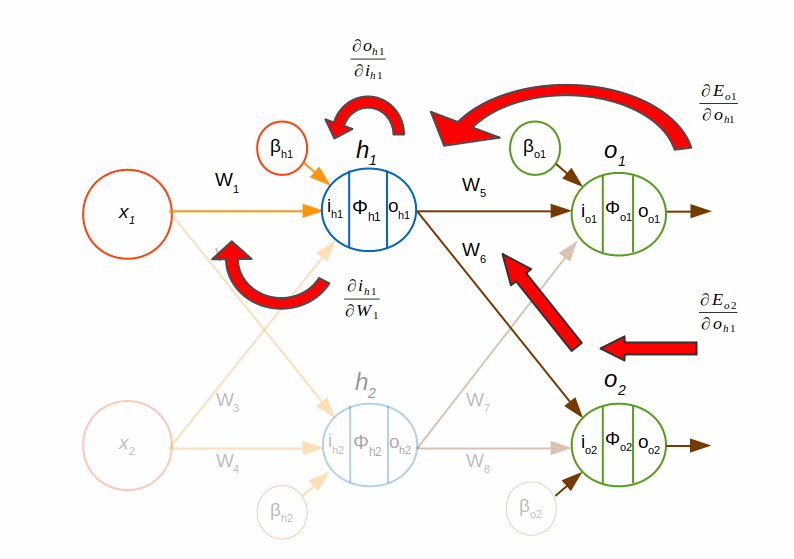
</div>$${\frac{\partial{E_{total}}}{\partial{W_1}}} ={\frac{\partial{E_{total}}}{\partial{o_{h1}}}} {\cdot} {\frac{\partial{o_{h1}}}{\partial{i_{h1}}}} {\cdot} {\frac{\partial{i_{h1}}}{\partial{W_1}}}$$

### <span style='font-family:"Times New Roman"'> <span styel=''>But, because $E_{total} = E_{o1} + E_{o2}$
    
$${\frac{\partial{E_{total}}}{\partial{W_1}}} =({\frac{\partial{E_{o1}}}{\partial{o_{h1}}}} + {\frac{\partial{E_{o2}}}{\partial{o_{h1}}}}) {\cdot} {\frac{\partial{o_{h1}}}{\partial{i_{h1}}}} {\cdot} {\frac{\partial{i_{h1}}}{\partial{W_1}}}$$

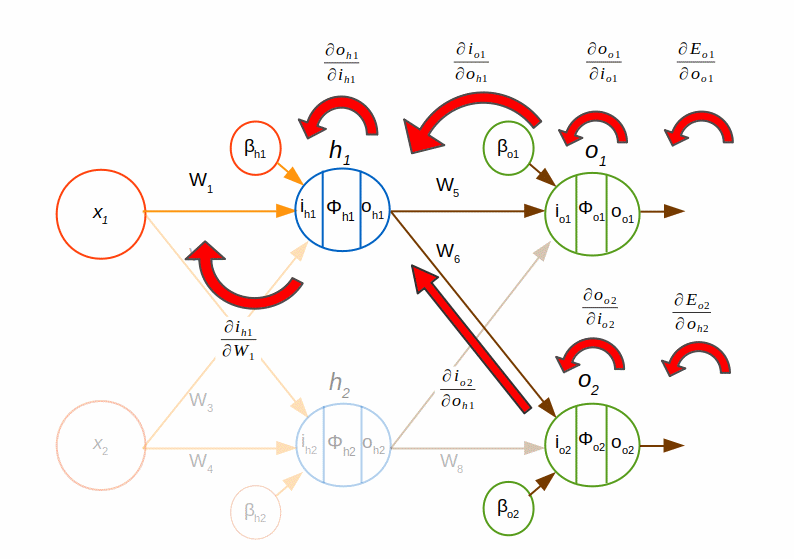$${\frac{\partial{E_{total}}}{\partial{W_1}}} =({\frac{\partial{E_{o1}}}{\partial{o_{o1}}}}\cdot{\frac{\partial{o_{o1}}}{\partial{i_{o1}}}}\cdot{\frac{\partial{i_{o1}}}{\partial{o_{h1}}}} + {\frac{\partial{E_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{o_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{i_{o2}}}{\partial{o_{h1}}}}) {\cdot} {\frac{\partial{o_{h1}}}{\partial{i_{h1}}}} {\cdot} {\frac{\partial{i_{h1}}}{\partial{W_1}}}$$


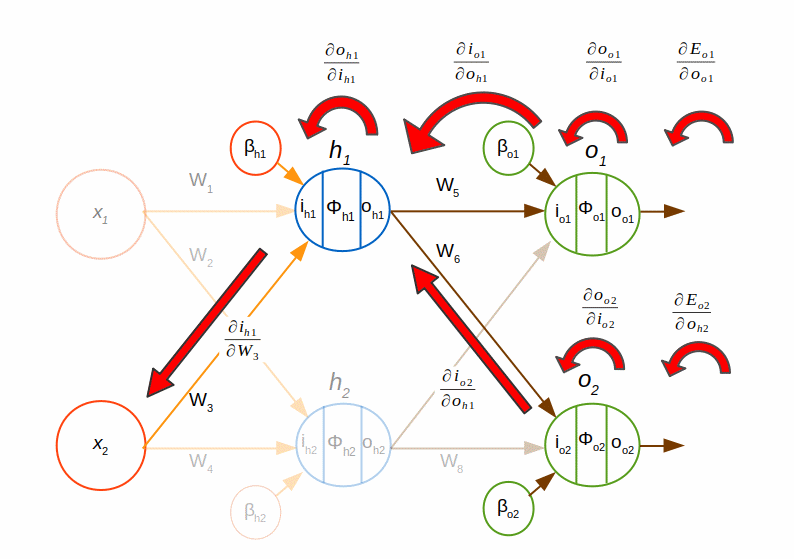$${\frac{\partial{E_{total}}}{\partial{W_3}}} =({\frac{\partial{E_{o1}}}{\partial{o_{o1}}}}\cdot{\frac{\partial{o_{o1}}}{\partial{i_{o1}}}}\cdot{\frac{\partial{i_{o1}}}{\partial{o_{h1}}}} + {\frac{\partial{E_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{o_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{i_{o2}}}{\partial{o_{h1}}}}) {\cdot} {\frac{\partial{o_{h1}}}{\partial{i_{h1}}}} {\cdot} {\frac{\partial{i_{h1}}}{\partial{W_3}}}$$

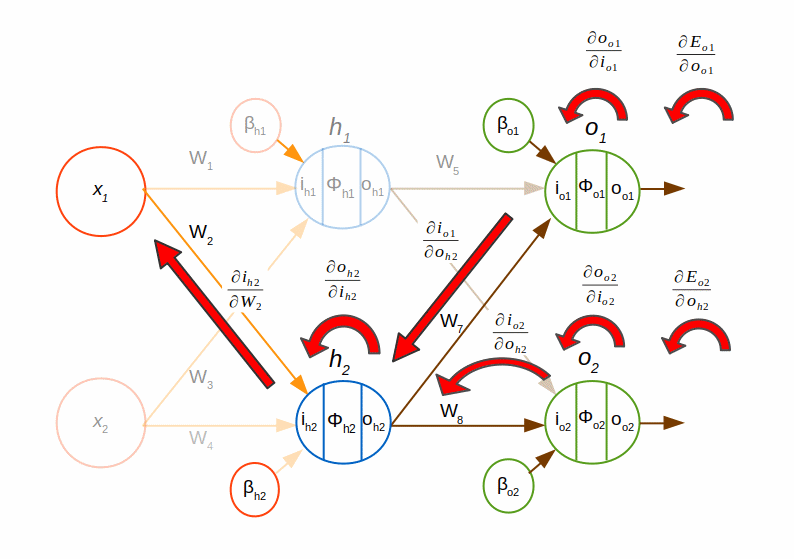$${\frac{\partial{E_{total}}}{\partial{W_2}}} =({\frac{\partial{E_{o1}}}{\partial{o_{o1}}}}\cdot{\frac{\partial{o_{o1}}}{\partial{i_{o1}}}}\cdot{\frac{\partial{i_{o1}}}{\partial{o_{h2}}}} + {\frac{\partial{E_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{o_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{i_{o2}}}{\partial{o_{h2}}}}) {\cdot} {\frac{\partial{o_{h2}}}{\partial{i_{h2}}}} {\cdot} {\frac{\partial{i_{h2}}}{\partial{W_2}}}$$

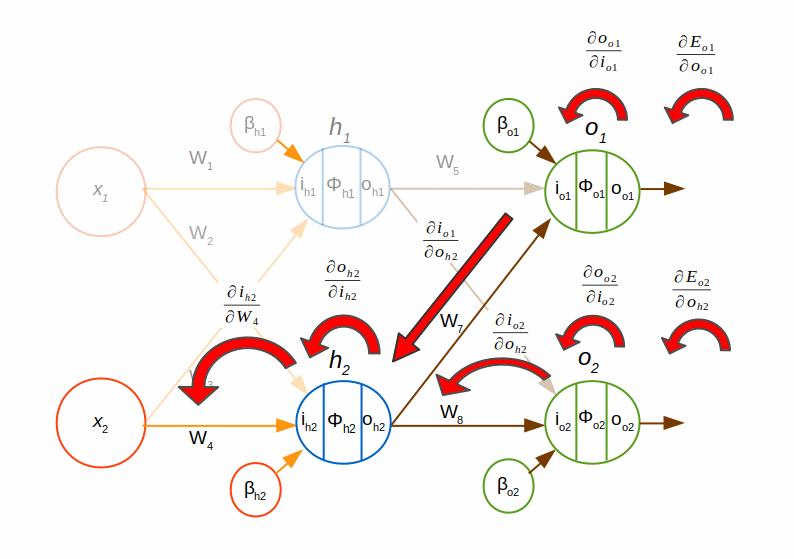$${\frac{\partial{E_{total}}}{\partial{W_4}}} =({\frac{\partial{E_{o1}}}{\partial{o_{o1}}}}\cdot{\frac{\partial{o_{o1}}}{\partial{i_{o1}}}}\cdot{\frac{\partial{i_{o1}}}{\partial{o_{h2}}}} + {\frac{\partial{E_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{o_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{i_{o2}}}{\partial{o_{h2}}}}) {\cdot} {\frac{\partial{o_{h2}}}{\partial{i_{h2}}}} {\cdot} {\frac{\partial{i_{h2}}}{\partial{W_4}}}$$

## <span style='font-family:"Times New Roman"'> <span styel=''> These equations tell us how error varies in function of weights

$${\frac{\partial{E_{total}}}{\partial{W_1}}} =({\frac{\partial{E_{o1}}}{\partial{o_{o1}}}}\cdot{\frac{\partial{o_{o1}}}{\partial{i_{o1}}}}\cdot{\frac{\partial{i_{o1}}}{\partial{o_{h1}}}} + {\frac{\partial{E_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{o_{o2}}}{\partial{i_{o2}}}}\cdot {\frac{\partial{i_{o2}}}{\partial{o_{h1}}}}) {\cdot} {\frac{\partial{o_{h1}}}{\partial{i_{h1}}}} {\cdot} {\frac{\partial{i_{h1}}}{\partial{W_1}}}$$

$${\frac{\partial{E_{total}}}{\partial{W_3}}} =({\frac{\partial{E_{o1}}}{\partial{o_{o1}}}}\cdot{\frac{\partial{o_{o1}}}{\partial{i_{o1}}}}\cdot{\frac{\partial{i_{o1}}}{\partial{o_{h1}}}} + {\frac{\partial{E_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{o_{o2}}}{\partial{i_{o2}}}}\cdot {\frac{\partial{i_{o2}}}{\partial{o_{h1}}}}) {\cdot} {\frac{\partial{o_{h1}}}{\partial{i_{h1}}}} {\cdot} {\frac{\partial{i_{h1}}}{\partial{W_3}}}$$

$${\frac{\partial{E_{total}}}{\partial{W_2}}} =({\frac{\partial{E_{o1}}}{\partial{o_{o1}}}}\cdot{\frac{\partial{o_{o1}}}{\partial{i_{o1}}}}\cdot{\frac{\partial{i_{o1}}}{\partial{o_{h2}}}} + {\frac{\partial{E_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{o_{o2}}}{\partial{i_{o2}}}}\cdot {\frac{\partial{i_{o2}}}{\partial{o_{h2}}}}) {\cdot} {\frac{\partial{o_{h2}}}{\partial{i_{h2}}}} {\cdot} {\frac{\partial{i_{h2}}}{\partial{W_2}}}$$

$${\frac{\partial{E_{total}}}{\partial{W_4}}} =({\frac{\partial{E_{o1}}}{\partial{o_{o1}}}}\cdot{\frac{\partial{o_{o1}}}{\partial{i_{o1}}}}\cdot{\frac{\partial{i_{o1}}}{\partial{o_{h2}}}} + {\frac{\partial{E_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{o_{o2}}}{\partial{o_{o2}}}}\cdot {\frac{\partial{i_{o2}}}{\partial{o_{h2}}}}) {\cdot} {\frac{\partial{o_{h2}}}{\partial{i_{h2}}}} {\cdot} {\frac{\partial{i_{h2}}}{\partial{W_4}}}$$

## <span style='font-family:"Times New Roman"'> <span styel=''> To solve them, we need of the expression of $E_{total}$, $o_{oi}$ and $ i_{oi} $
$$ i_{h1} = W_{1}\cdot o_{(h-1)1} +  W_{3}\cdot o_{(h-1)2} + \beta_{h1} \\ i_{h2} = W_{2}\cdot o_{(h-1)1} +  W_{4}\cdot o_{(h-1)2} + \beta_{h2} \\ i_{hj} = \sum_{i=1}^n W_{ji}\cdot o_{(h-1)i} + \beta_{hj} $$ with  _j_  neurons and *i* inputs
## <span style='font-family:"Times New Roman"'> <span styel=''>To function to $o_{hi}$ and $o_{oi}$
    
$$o_{h1} = \phi_{h}(i_{h1}) \\ o_{h2} = \phi_{h}(i_{h2}) \\ o_{o1} = \phi_{o}(i_{o1}) \\ o_{o2} = \phi_{o}(i_{o2}) \\ o_{lj} = \phi_{l}(i_{lj})$$

## <span style='font-family:"Times New Roman"'> <span styel=''>Between a layer output and next layer input, we have
$$ i_{o1} = W_{5}\cdot o_{h1} +  W_{7}\cdot o_{h2} + \beta_{o1} \\ i_{o2} = W_{6}\cdot o_{h1} +  W_{8}\cdot o_{h2} + \beta_{o2} \\ i_{oj} = \sum_{i=1}^n W_{ji}\cdot o_{hi} + \beta_{oj} $$ with  _j_  neurons and *i* inputs
    
## <span style='font-family:"Times New Roman"'> <span styel=''>If we use Mean Squared Error(MSE) to calculate output errors, then 
$$E_{total} = E_{o1} + E_{o2} \\ E_{total} = {\frac{1}{2}(y_1 - o_{o1})^2 + \frac{1}{2}(y_2 - o_{o2})^2} \\ E_{oj} = {\frac{1}{2}(y_j - o_{oj})^2} $$  y - target and  $o_o$ - output
## <span style='font-family:"Times New Roman"'> <span styel=''> Applying derivades, we get  
$${\frac{\partial{E_{oj}}}{\partial{o_{oj}}}} = -(y_j - o_{oj})$$
    
$${\frac{\partial{o_{oj}}}{\partial{i_{oj}}}} = \phi_{o}'(i_{oj})$$ 

$${\frac{\partial{o_{hj}}}{\partial{i_{hj}}}} = \phi_{h}'(i_{hj})$$

$${\frac{\partial{i_{oj}}}{\partial{o_{hi}}}} = W_{ji}$$

$${\frac{\partial{i_{hj}}}{\partial{W_{ji}}}} =  o_{(h-1)i} $$ with  _j_  neurons and *i* inputs

## <span style='font-family:"Times New Roman"'> <span styel=''>We have
### $${\frac{\partial{E_{total}}}{\partial{W_{ji}}}} =(\sum_{j=1}^n -(y_j - o_{oj})\cdot \phi_{oj}'(i_{oj})\cdot W_{(h+1)ji})\cdot\phi_{hj}'(i_{hj})\cdot o_{(h-1)i} $$

## <span style='font-family:"Times New Roman"'> <span styel=''>And all the gradients to hidden layer
$$ \begin{bmatrix} \nabla_{W1} E_{total} & \nabla_{W3} E_{total} \\ \nabla_{W2} E_{total} & \nabla_{W4} E_{total}\end{bmatrix}_{(jxi)} = \nabla_{Wji} E_{total} $$
    
#### $$\nabla_{Wji} E_{total}=\begin{bmatrix} -(y_1 - o_{o1})\cdot \phi_{o1}'(i_{o1})\cdot W_{11}) & -(y_2 - o_{o2})\cdot \phi_{o2}'(i_{o2})\cdot W_{21}) \\ -(y_1 - o_{o1})\cdot \phi_{o1}'(i_{o1})\cdot W_{12}) & -(y_2 - o_{o2})\cdot \phi_{o2}'(i_{o2})\cdot W_{22}) \end{bmatrix}_{(jxi)} \times \begin{bmatrix} \phi_{h1}'(i_{h1})\cdot o_{(h-1)1} & \phi_{h2}'(i_{h2})\cdot o_{(h-1)2} \\ \phi_{h1}'(i_{h1})\cdot o_{(h-1)1} & \phi_{h2}'(i_{h2})\cdot o_{(h-1)2}\end{bmatrix}_{(ixi)} $$

# <span style='font-family:"Times New Roman"'> <span styel=''>Let's analyse these matrix
##### $$\begin{bmatrix} (output-info) \cdot ((layer+1)-weight) & (output-info) \cdot ((layer+1)-weight) \\ (output-info) \cdot ((layer+1)-weight) & (output-info) \cdot ((layer+1)-weight) \end{bmatrix}_{(jxi)} $$
$$\begin{bmatrix} (layer-info)\cdot ((layer-1)-output) & (layer-info)\cdot ((layer-1)-output) \\ (layer-info)\cdot ((layer-1)-output) & (layer-info)\cdot ((layer-1)-output)\end{bmatrix}_{(ixi)} $$
## <span style='font-family:"Times New Roman"'> <span styel=''>If our Network has more hidden layers, we can iterate this calculus. All of we will need is; output info, previous layer info, next layer info and current layer info

# <span style='font-family:"Times New Roman"'> <span styel=''> Class NeuralNetwork
## <span style='font-family:"Times New Roman"'> <span styel=''>This class build a complete Network, implements the backpropagation algorithm, training function.

In [1929]:
class NeuralNetwork:
    """
    Class NeuralNetwork
        
    function add_layer: append a New Layer at end of the stack. 
    
        *New Layer inputs should be compatible with previous layer neurons amount
    
    function feed_foward: takes a input and forward its effect throughout the layers
    
    function predict: return a network output to an input
    
    function backpropagation: back propagates errors throughout the network and update layer's errors
    
    function train: train the network to reach targets Y by the X inputs
    
    function error: returns the network error for an entry

    """
    
    def __init__(self):
        self._layers=[]
        
    def add_layer(self, layer):
        self._layers.append(layer)
        
    def feed_foward(self, inputs):
        for layer in self._layers:
            inputs = layer.activate(inputs)
        return inputs
    
    def predict(self, inputs):
        pred = []
        if(inputs.ndim==2):
            for i in range(len(inputs)):
                #print(inputs.ndim)
                feed_foward = self.feed_foward(inputs[i])
                pred.append(feed_foward)
            return pred
        else:
            feed_foward = self.feed_foward(inputs)
            return feed_foward
    
    def backpropagation(self, X, y, learning_rate=0.0001):
        next_layer_input = self.feed_foward(X)
        #Calculating Delta for eath layer
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i]
            # To the output layer, Delta = Error*Phi(R)
            if layer == self._layers[-1]:
                layer.error = (y - next_layer_input)
                # E*Phi(z)
                layer.delta = layer.error * layer.phi_derivade(next_layer_input)
            # To other layers, Delta = (Delta_i+1 X W_i+1)*Phi(R)
            else:
                left_layer = self._layers[i + 1]
                # Delta_i+1 X W_i+1
                layer.error = np.dot(left_layer.delta, left_layer.weigths)
                # E_i+1 X Phi(R)
                layer.delta = layer.error * layer.phi_derivade(layer.last_activation)
        # Updating layer's weights
        for i in range(len(self._layers)):
                layer = self._layers[i]
                # input i
                input_to_use = np.atleast_2d(X if i == 0 else self._layers[i - 1].last_activation)
                #Calculating new Weigths for each layer
                # nabla x Delta x i
                layer.weigths += learning_rate * np.dot(layer.delta.reshape(-1,1), input_to_use.reshape(1,-1))
    def train(self, X, y, learning_rate, max_epochs):
        errors=[]
        for i in range(max_epochs):
            # For each input sample, back propagate error and update weights
            for j in range(len(X)):
                self.backpropagation(X[j], y[j], learning_rate)
            # At end, calculate mse of each epoch
            self.error(X,y,errors,i,'mse')
        return errors
    def error(self, X, y, var, epoch_i, error):
        mse=[]
        if error=='mse':
            for k in range(len(X)):
                mse.append(np.mean(np.square(y[k] - self.feed_foward(X[k]))))
            print('Epoch: %s, MSE: %.30f' % (epoch_i+1, float(np.mean(mse))))   
            var.append(np.mean(mse))
            return np.mean(var)
    def accuracy(self, y_pred, y_target):
        return (y_pred == y_target).mean()

## <span style='font-family:"Times New Roman"'> <span styel=''>Testing algorithm

In [1930]:
nn = NeuralNetwork()
input_l = Layer(n_inputs=3,n_neurons=10,weigths=None, bias=np.zeros(10), activation_type='linear')

hidden_l = Layer(n_inputs=10,n_neurons=10,weigths=None, bias=None, activation_type='sigmoid')

output_l = Layer(n_inputs=10,n_neurons=1,weigths=None, bias=None, activation_type='linear')

nn.add_layer(input_l)
nn.add_layer(hidden_l)
nn.add_layer(output_l)

### <span style='font-family:"Times New Roman"'> <span styel=''> Solve 3 variable AND function: 


In [1931]:
X = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
X

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [1932]:
y = np.array([[0,],[0,],[0,],[0,],[0,],[0,],[0,],[1,]])
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [1933]:
errors = nn.train(X, y,learning_rate=0.3, max_epochs=500)

Epoch: 1, MSE: 25.407709867598157416068715974689
Epoch: 2, MSE: 0.900844132691185128791744318733
Epoch: 3, MSE: 0.218510029448172216071100137924
Epoch: 4, MSE: 0.238329246362059155028845225388
Epoch: 5, MSE: 0.179574013438439872292207155624
Epoch: 6, MSE: 0.177633425753860069162826107458
Epoch: 7, MSE: 0.176070271404135170190130565970
Epoch: 8, MSE: 0.172810563949166551278580072903
Epoch: 9, MSE: 0.160305709096095927446157247687
Epoch: 10, MSE: 0.112357632117255828996249533702
Epoch: 11, MSE: 0.060073709813186493278180932975
Epoch: 12, MSE: 0.067513405284103683579033372553
Epoch: 13, MSE: 0.031496135489273158203360480911
Epoch: 14, MSE: 0.079998721908948092207403135490
Epoch: 15, MSE: 0.019538198569261103210159546961
Epoch: 16, MSE: 0.038301289666929298760589261974
Epoch: 17, MSE: 0.035048074243945112615783443744
Epoch: 18, MSE: 0.021729497922019360561796119669
Epoch: 19, MSE: 0.010979705493700288310154888904
Epoch: 20, MSE: 0.006950430256334147113839172505
Epoch: 21, MSE: 0.0064821626

Epoch: 200, MSE: 0.003816722754833539246743789874
Epoch: 201, MSE: 0.003814343529217248569829212812
Epoch: 202, MSE: 0.003811984910996657049259139782
Epoch: 203, MSE: 0.003809646626116326185995664133
Epoch: 204, MSE: 0.003807328405242648913797687271
Epoch: 205, MSE: 0.003805029983661990106158512503
Epoch: 206, MSE: 0.003802751101181380162519207744
Epoch: 207, MSE: 0.003800491502031802873440291535
Epoch: 208, MSE: 0.003798250934773943123662354182
Epoch: 209, MSE: 0.003796029152206318538903540016
Epoch: 210, MSE: 0.003793825911275728723220934668
Epoch: 211, MSE: 0.003791640972990033796319320203
Epoch: 212, MSE: 0.003789474102332980771923320873
Epoch: 213, MSE: 0.003787325068181316301690886306
Epoch: 214, MSE: 0.003785193643223832768440750840
Epoch: 215, MSE: 0.003783079603882513394785824801
Epoch: 216, MSE: 0.003780982730235549985758902736
Epoch: 217, MSE: 0.003778902805942293153390609817
Epoch: 218, MSE: 0.003776839618170034409277979748
Epoch: 219, MSE: 0.003774792957522557241417660023


Epoch: 456, MSE: 0.003516305215019592360359279581
Epoch: 457, MSE: 0.003515642041444787084525369636
Epoch: 458, MSE: 0.003514980048910015374835635882
Epoch: 459, MSE: 0.003514319223690168508128506275
Epoch: 460, MSE: 0.003513659552482793595185039948
Epoch: 461, MSE: 0.003513001022422514336984722405
Epoch: 462, MSE: 0.003512343621096068475156970479
Epoch: 463, MSE: 0.003511687336557925941116220514
Epoch: 464, MSE: 0.003511032157346505918477097552
Epoch: 465, MSE: 0.003510378072501046161496551790
Epoch: 466, MSE: 0.003509725071579077732009110946
Epoch: 467, MSE: 0.003509073144674558063921265827
Epoch: 468, MSE: 0.003508422282436668860478024001
Epoch: 469, MSE: 0.003507772476089260176024264837
Epoch: 470, MSE: 0.003507123717451012673285148935
Epoch: 471, MSE: 0.003506475998956228284225700165
Epoch: 472, MSE: 0.003505829313676391088133721397
Epoch: 473, MSE: 0.003505183655342368736346214675
Epoch: 474, MSE: 0.003504539018367348966048746561
Epoch: 475, MSE: 0.003503895397870495156955605864


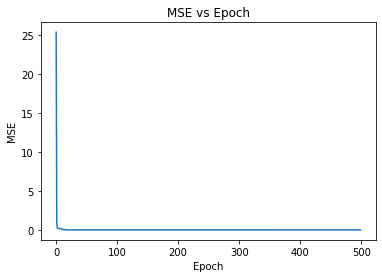

In [1934]:
# Plot changes in mse
plt.plot(errors)
plt.title('MSE vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [1935]:
nn.predict(X[0])

array([-1.72946938e-05])

In [1936]:
nn.predict(X[0])

array([-1.72946938e-05])

In [1937]:
nn.predict(X[1])

array([-0.00317521])

In [1938]:
nn.predict(X[2])

array([-0.00032228])

In [1939]:
nn.predict(X[3])

array([0.01252498])

In [1940]:
nn.predict(X[4])

array([0.0114838])

In [1941]:
nn.predict(X[5])

array([-0.00614965])

In [1942]:
nn.predict(X[6])

array([-0.0068566])

In [1943]:
nn.predict(X[7])

array([0.83410443])

In [1944]:
y_pred = nn.predict(X)
y_pred = np.array(y_pred)

In [1945]:
nn.accuracy(y_pred.round(),y)

1.0

### <span style='font-family:"Times New Roman"'> <span styel=''>BIBLIOGRAPHY

##### <span style='font-family:"Times New Roman"'> <span styel=''>[Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)

##### <span style='font-family:"Times New Roman"'> <span styel=''>[Backpropagation implementation](https://blog.zhaytam.com/2018/08/15/implement-neural-network-backpropagation/)

##### <span style='font-family:"Times New Roman"'> <span styel=''>[Back propagation explained](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)

##### <span style='font-family:"Times New Roman"'> <span styel=''>[Activation functions](https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0)

##### <span style='font-family:"Times New Roman"'> <span styel=''>[Activation functions](http://www.snee.com/bobdc.blog/2017/09/understanding-activation-funct.html)

In [1946]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [1947]:
iris = datasets.load_iris()

In [1948]:
X2 = normalize(iris.data)
X2

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [1949]:
y2 = iris.target
y2 #= Y2.reshape(-1,1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [1961]:
nn2 = NeuralNetwork()

A = Layer(n_inputs=4,n_neurons=4,weigths=None, bias=np.zeros(4), activation_type='linear')

B = Layer(n_inputs=4,n_neurons=4,weigths=None, bias=None, activation_type='sigmoid')

C = Layer(n_inputs=4,n_neurons=4,weigths=None, bias=None, activation_type='sigmoid')

D = Layer(n_inputs=4,n_neurons=1,weigths=None, bias=None, activation_type='linear')

nn2.add_layer(A)
nn2.add_layer(B)
nn2.add_layer(C)
nn2.add_layer(D)

In [1962]:
err = nn2.train(X2,y2, learning_rate=0.03, max_epochs=200)

Epoch: 1, MSE: 1.634707565469586842965554751572
Epoch: 2, MSE: 1.634473388689086315039844521380
Epoch: 3, MSE: 1.634237814313266978771821413829
Epoch: 4, MSE: 1.633999245731715177498699631542
Epoch: 5, MSE: 1.633757618865047556155900565500
Epoch: 6, MSE: 1.633512867786481415066646150080
Epoch: 7, MSE: 1.633264924654194594211276125861
Epoch: 8, MSE: 1.633013719642283367861068654747
Epoch: 9, MSE: 1.632759180868485815452118004032
Epoch: 10, MSE: 1.632501234318523231081599078607
Epoch: 11, MSE: 1.632239803766826424791247518442
Epoch: 12, MSE: 1.631974810693465949285041460826
Epoch: 13, MSE: 1.631706174197039782569618182606
Epoch: 14, MSE: 1.631433810903281544923970614036
Epoch: 15, MSE: 1.631157634869137451616438738711
Epoch: 16, MSE: 1.630877557482028894497716464684
Epoch: 17, MSE: 1.630593487353994897048892198654
Epoch: 18, MSE: 1.630305330210422898318256557104
Epoch: 19, MSE: 1.630012988772982618357332285086
Epoch: 20, MSE: 1.629716362636440152300565387122
Epoch: 21, MSE: 1.62941534813

Epoch: 173, MSE: 0.140959390639729148508862976996
Epoch: 174, MSE: 0.140852973581559376414773510078
Epoch: 175, MSE: 0.140754953296077345292758309370
Epoch: 176, MSE: 0.140664012070214033967019418014
Epoch: 177, MSE: 0.140579046957262088213269635162
Epoch: 178, MSE: 0.140499133877605153486456401879
Epoch: 179, MSE: 0.140423497885338866009163893978
Epoch: 180, MSE: 0.140351488509190963638317839468
Epoch: 181, MSE: 0.140282559275444002055976966403
Epoch: 182, MSE: 0.140216250682548476680366889013
Epoch: 183, MSE: 0.140152176028917857530942114863
Epoch: 184, MSE: 0.140090009602566317736815904027
Epoch: 185, MSE: 0.140029476828622767570209362020
Epoch: 186, MSE: 0.139970346041996956953923358924
Epoch: 187, MSE: 0.139912421610733805898973969306
Epoch: 188, MSE: 0.139855538183282807063179120632
Epoch: 189, MSE: 0.139799555872010067281152601026
Epoch: 190, MSE: 0.139744356217449350321402334885
Epoch: 191, MSE: 0.139689838804238491976050795529
Epoch: 192, MSE: 0.139635918421533999911332557531


In [1963]:
y_pred= nn2.predict(X2)
y_pred= np.array(y_pred)

In [1964]:
nn2.accuracy(y_pred.round(), y2)

0.3333333333333333